In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [ ]:
final_data = pd.read_csv("/Users/Manoj/Documents/metis/final_data.csv",converters={"movies":lambda x:x.strip("[]").split(",")})

In [126]:
#final_data = final_data.drop(['a1*a2', 'a2*a3', 'a3*a1', 'a1*d', 'a2*d', 'a3*d'],axis=1)

In [2]:
final_data.columns

Index(['Unnamed: 0', 'Release_Date', 'Movie', 'Gross', 'Genre', 'Run_Time',
       'Rating', 'Budget', 'Num_theatres', 'Actors', 'Producer', 'Writer',
       'Director', 'ROI', 'Competitors', 'clean_movie', 'Actor1', 'Actor2',
       'Actor3', 'director_gross', 'producer_gross', 'writer_gross', 'month',
       'a1*a2', 'a2*a3', 'a3*a1', 'a1*d', 'a2*d', 'a3*d', 'a1a2', 'a2a3',
       'a3a1', 'a1d', 'a2d', 'a3d', 'a1a2a3', 'a1a2a3d', 'year',
       'Gross_inflate', 'Budget_inflate'],
      dtype='object')

In [3]:
from datetime import datetime
from datetime import timedelta
final_data["Release_Date"] = final_data["Release_Date"].apply(lambda x: datetime.strptime(x,"%Y-%m-%d") )

In [4]:
final_data.loc[(final_data["month"] == "January") | (final_data["month"] == "February") | (final_data["month"] == "March")| (final_data["month"] == "April"),"month"] = "J_A" 

In [5]:
final_data.loc[(final_data["month"] == "May") | (final_data["month"] == "June") | (final_data["month"] == "July"),"month"] = "May_July" 

In [6]:
final_data.loc[(final_data["month"] == "August") | (final_data["month"] == "September") | (final_data["month"] == "October"),"month"] = "Aug_Sept" 

In [7]:
final_data.loc[(final_data["Rating"] == "PG") | (final_data["Rating"] == "PG-13"),"Rating"] = "PG" 

In [8]:
final_data["Genre"].value_counts()

Drama        463
Comedy       400
Action       168
Horror       139
Thriller     104
Sci-Fi        93
Adventure     60
Fantasy       51
Romance       35
Foreign       30
Unknown        9
Name: Genre, dtype: int64

In [9]:
import math
def log_x(x):
    return math.log(x)
final_data["log_gross_inflate"] = final_data["Gross_inflate"].apply(log_x)

In [10]:
import math
def log_x(x):
    return math.log(x)
final_data["log_budget_inflate"] = final_data["Budget_inflate"].apply(log_x)

In [12]:
from sklearn import preprocessing
to_scale = final_data[["log_budget_inflate","Run_Time","Num_theatres","Competitors","director_gross",
                      "producer_gross","a1d","a2d","a3d","Actor1","Actor2","Actor3"]]
numpyMatrix = to_scale.as_matrix().astype(float)
X_scaled = preprocessing.scale(numpyMatrix)

/Users/Manoj/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:167: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [ ]:
X_scaled = pd.DataFrame(X_scaled)

In [ ]:
X_scaled.columns = ["log_budget_inflate","Run_Time","Num_theatres","Competitors","director_gross",
                      "producer_gross","a1d","a2d","a3d","Actor1","Actor2","Actor3","days"]

In [ ]:
final_x = pd.concat([final_data[["month","Genre","Rating","log_gross_inflate","Gross_inflate"]],X_scaled,],axis=1)

In [ ]:
import statsmodels.api as sm
import pandas
from patsy import dmatrices




In [1020]:
y, X = dmatrices('log_gross_inflate ~  month+Genre+Rating+log_budget_inflate+Run_Time+Num_theatres+director_gross+Actor1+Actor2+Actor3+days', data=final_x, return_type='dataframe')

In [233]:
mod = sm.OLS(y, X)
res = mod.fit() 
print (res.summary())

                            OLS Regression Results                            
Dep. Variable:      log_gross_inflate   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     260.2
Date:                Thu, 14 Jul 2016   Prob (F-statistic):               0.00
Time:                        06:56:21   Log-Likelihood:                -2174.1
No. Observations:                1552   AIC:                             4394.
Df Residuals:                    1529   BIC:                             4517.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept             15.9500      0

#### Distribution not normal (Prob(Omnibus) and Prob(JB) are significant)

(array([  1.23500000e+03,   2.14000000e+02,   5.40000000e+01,
          3.30000000e+01,   1.00000000e+01,   2.00000000e+00,
          3.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  3.57000000e+01,   9.46029169e+07,   1.89205798e+08,
          2.83808679e+08,   3.78411560e+08,   4.73014441e+08,
          5.67617323e+08,   6.62220204e+08,   7.56823085e+08,
          8.51425966e+08,   9.46028847e+08]),
 <a list of 10 Patch objects>)

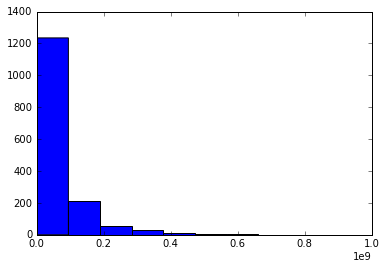

In [18]:
plt.hist(np.array(final_data["Gross_inflate"]))

#### Plot is right skewed

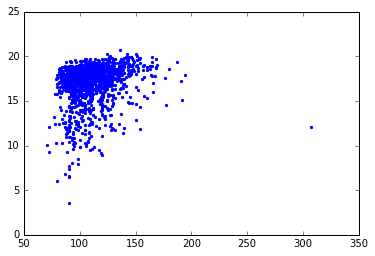

In [195]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


y = final_data["log_gross_inflate"]
x = final_data["Run_Time"]



plt.scatter(x,y,color='blue',s=5)

In [159]:
final_data["log_director_gross"] = final_data["director_gross"].apply(np.log)

In [161]:
final_data["log_director_gross"][1:5]

1         -inf
2         -inf
3    16.860470
4    16.845580
Name: log_director_gross, dtype: float64

In [170]:
final_data["log_director_gross"] = final_data["log_director_gross"].replace([np.inf, -np.inf], 0)

In [180]:
final_data["log_Num_theatres"] = final_data["Num_theatres"].apply(np.log)

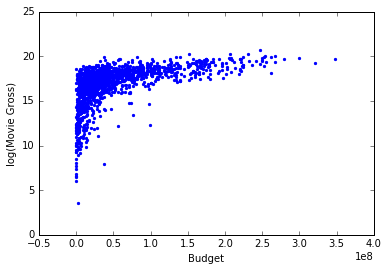

In [1071]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


y = final_data["log_gross_inflate"]
x = final_data["Budget_inflate"]
plt.xlabel('Budget')
plt.ylabel('log(Movie Gross)')


plt.scatter(x,y,color='blue',s=5)

In [1061]:
import statsmodels.api as sm
import pandas
from patsy import dmatrices

y, X = dmatrices('log_gross_inflate ~  month+Genre+Rating+(Rating*month)+log_budget_inflate+Run_Time+Num_theatres+director_gross', data=final_x, return_type='dataframe')
mod = sm.OLS(y, X)
res = mod.fit() 
print (res.summary())

                            OLS Regression Results                            
Dep. Variable:      log_gross_inflate   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     173.9
Date:                Thu, 14 Jul 2016   Prob (F-statistic):               0.00
Time:                        17:50:09   Log-Likelihood:                -2149.4
No. Observations:                1552   AIC:                             4369.
Df Residuals:                    1517   BIC:                             4556.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------
In

In [1046]:
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)

In [1047]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [1049]:
from sklearn.cross_validation import KFold
from sklearn.metrics import r2_score,mean_squared_error
kf = KFold(len(X_train), n_folds=10)
lasso = []
ridge = []
for train,test in kf:
    lsv = linear_model.LassoCV(cv=10)    
    lsv.fit(X_train.loc[train],np.array(y_train.loc[train]).reshape(len(train),))
    lasso.append(lsv.score(X_train.loc[test],y_train.loc[test])) 
    
    
    rcv = linear_model.RidgeCV(cv=10)
    rcv.fit(X_train.loc[train],np.array(y_train.loc[train]).reshape(len(train),))
    rc= rcv.predict(X_train.loc[test])
    ridge.append(rcv.score(X_train.loc[test],y_train.loc[test]))
 
cf_r = rcv.coef_.tolist()
cf_l = lsv.coef_.tolist()  
        

In [1063]:
lsv.alpha_
rcv.alpha_

10.0

In [1050]:
print(lasso)
print(ridge)

[0.7578111125109861, 0.78814075509687798, 0.82212129665249378, 0.73992531890552371, 0.76391625573349975, 0.72531456274195683, 0.75137077199951796, 0.7663956358468127, 0.77215951154862417, 0.77706051022562872]
[0.75481436237963695, 0.78867203477906267, 0.82264958218395523, 0.74021531059736256, 0.76806597136282462, 0.73300226495369702, 0.7637032332753555, 0.76525595500085231, 0.77626858836398027, 0.77456886024177507]


In [1058]:

print("Ridge coeff:")
coeff_list = [(col,coeff) for col,coeff in zip(X_train.columns,cf_r)]
for i in coeff_list:
    print(i,'\n')

    

Ridge coeff:
('Intercept', 0.0) 

('month[T.December]', 0.268918711198712) 

('month[T.J_A]', -0.062404831493445126) 

('month[T.May_July]', 0.04194657156832533) 

('month[T.November]', 0.2229131786481951) 

('Genre[T.Adventure]', 0.0377024301169863) 

('Genre[T.Comedy]', 0.1625257830055429) 

('Genre[T.Drama]', 0.23464860968807155) 

('Genre[T.Fantasy]', 0.1135035618572656) 

('Genre[T.Foreign]', 0.5990752935971108) 

('Genre[T.Horror]', 0.1650430953195649) 

('Genre[T.Romance]', 0.33303258921242684) 

('Genre[T.Sci-Fi]', 0.018128496385509237) 

('Genre[T.Thriller]', 0.19748135160091188) 

('Genre[T.Unknown]', -0.3347145729970265) 

('Rating[T.NC-17]', 0.15624953035285555) 

('Rating[T.PG]', 0.2764680510733203) 

('Rating[T.R]', 0.374244841266238) 

('Rating[T.Unrated]', -1.068805907738069) 

('Rating[T.NC-17]:month[T.December]', 0.0) 

('Rating[T.PG]:month[T.December]', -0.16164512524732919) 

('Rating[T.R]:month[T.December]', 0.3534461839268377) 

('Rating[T.Unrated]:month[T.Decembe

In [1052]:

print("Lasso coeff:")
coeff_list = [(col,coeff) for col,coeff in zip(X_train.columns,cf_l)]
for i in coeff_list:
    print(i,'\n')



Lasso coeff:
('Intercept', 0.0) 

('month[T.December]', 0.10651746613236392) 

('month[T.J_A]', 0.0) 

('month[T.May_July]', -0.0) 

('month[T.November]', 0.06440960463351075) 

('Genre[T.Adventure]', 0.0) 

('Genre[T.Comedy]', 0.1596411662955885) 

('Genre[T.Drama]', 0.2784306147738407) 

('Genre[T.Fantasy]', -0.0) 

('Genre[T.Foreign]', 0.924896535842996) 

('Genre[T.Horror]', 0.2606990674852323) 

('Genre[T.Romance]', 0.24594693970974615) 

('Genre[T.Sci-Fi]', -0.0) 

('Genre[T.Thriller]', 0.17641516087258036) 

('Genre[T.Unknown]', -0.0) 

('Rating[T.NC-17]', 0.0) 

('Rating[T.PG]', -0.0) 

('Rating[T.R]', 0.15456284104991516) 

('Rating[T.Unrated]', -2.024322543665298) 

('Rating[T.NC-17]:month[T.December]', 0.0) 

('Rating[T.PG]:month[T.December]', -0.0) 

('Rating[T.R]:month[T.December]', 0.4794202289335735) 

('Rating[T.Unrated]:month[T.December]', 0.0) 

('Rating[T.NC-17]:month[T.J_A]', 0.0) 

('Rating[T.PG]:month[T.J_A]', 0.0) 

('Rating[T.R]:month[T.J_A]', 0.0) 

('Rating[T.

In [1053]:
p_rcv = rcv.predict(X_test)
p_lsv = lsv.predict(X_test)

#### Ridge regression

In [1054]:
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_test,p_rcv))
print(mean_squared_error(y_test,p_rcv))

0.780202613267
0.97587162984


#### Lasso Regression

In [1055]:
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_test,p_lsv))
print(mean_squared_error(y_test,p_lsv))

0.780276341748
0.975544285033


In [1064]:
lsv.coef_

array([ 0.        ,  0.10651747,  0.        , -0.        ,  0.0644096 ,
        0.        ,  0.15964117,  0.27843061, -0.        ,  0.92489654,
        0.26069907,  0.24594694, -0.        ,  0.17641516, -0.        ,
        0.        , -0.        ,  0.15456284, -2.02432254,  0.        ,
       -0.        ,  0.47942023,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.00389759,  0.        ,
        0.        ,  0.        , -0.        ,  0.16343495,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.20417346,  0.26578123, -0.01844912,  0.        ,
        0.07352572, -0.        , -0.00866254,  0.        ,  0.        ,
        0.        ,  0.        ,  0.16262017,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.91257697,
        0.        , -0.        , -0.48299972,  0.        ,  0.  

# Ridge

In [1072]:
compare = pd.concat([y_test,pd.DataFrame(p_rcv,index=y_test.index)],axis = 1)
compare = compare.sort(['log_gross_inflate'],ascending = False)
compare.columns = ["log_gross_inflate","pred"]
compare_pred = compare.sort(['pred'],ascending = False)
test_ind = compare.index.tolist()
pred_ind = compare_pred.index.tolist()
original = final_data.ix[test_ind,"Movie"][:25]
predicted = final_data.ix[pred_ind,"Movie"][:25]
original = pd.DataFrame(original)
predicted = pd.DataFrame(predicted)
count = 0
print(original,predicted)
for i in predicted["Movie"]:
    if len(original[(original["Movie"].str.contains(i))]) == 0:
        print(i)
    
        
    

/Users/Manoj/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app
/Users/Manoj/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


                                                  Movie
1114                              Marvel's The Avengers
350           Pirates of the Caribbean:Dead Man's Chest
1115                              The Dark Knight Rises
62                            The Passion of the Christ
1433                             Avengers:Age of Ultron
1116                                   The Hunger Games
1219                                         Iron Man 3
465                                        Spider-Man 3
1003                      Transformers:Dark of the Moon
1516                                           Deadpool
214   The Chronicles of Narnia:The Lion, the Witch a...
557                                            Iron Man
1434                                          Furious 7
558   Indiana Jones and the Kingdom of the Crystal S...
63                                     Meet the Fockers
838                                          Iron Man 2
468           Harry Potter and the Order of the 

# Lasso

In [1057]:
compare = pd.concat([y_test,pd.DataFrame(p_lsv,index=y_test.index)],axis = 1)
compare = compare.sort(['log_gross_inflate'],ascending = False)
compare.columns = ["log_gross_inflate","pred"]
compare_pred = compare.sort(['pred'],ascending = False)
test_ind = compare.index.tolist()
pred_ind = compare_pred.index.tolist()
original = final_data.ix[test_ind,"Movie"][:25]
predicted = final_data.ix[pred_ind,"Movie"][:25]
original = pd.DataFrame(original)
predicted = pd.DataFrame(predicted)
count = 0
for i in predicted["Movie"]:
    if len(original[(original["Movie"].str.contains(i))]) == 0:
        print(i)
    
        
    

MIB 3
Interstellar
Dark Shadows
Troy
Get Smart
Star Trek Into Darkness


/Users/Manoj/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app
/Users/Manoj/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
